# TRAVEL AGGREGATOR ANALYSIS

> "MyNextBooking"
> It is the ticket booking app.
> It's one of the new startup that helps user compares the ticket   price for their upcoming journey on its platform and redirects to the desired platform after looking at the price.

## Task 
> This analysis analyzes the data which has been collected over a while.
> The datsets that I have for this project are:
1) Booking.csv
2) Sessions.csv


In [32]:
# Loading these two data sets and downloading the required packages for that.
import pandas as pd

# Load the CSV files
bookings_df = pd.read_csv("Bookings.csv")
sessions_df = pd.read_csv("Sessions.csv")

# Display the data
print("First few rows of Booking datasets.")
print(bookings_df.head())  # Displays the first few rows of the Bookings dataset
print("First few rows of Sessions datasets.")
print(sessions_df.head())  # Displays the first few rows of the Sessions dataset


First few rows of Booking datasets.
    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country          booking_time device_type_used  INR_Amount service_name  \
0      India  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   
1    Belgium  2018-11-21T08:21:47Z          Android    23120.00        YATRA   
2    Germany  2019-12-16T22:54:58Z          Android    25717.60        YATRA   
3    Germany  2021-10-29T12:25:38Z          Desktop   135969.60      GOIBIBO   
4     France  2020-08-11T16:09:10Z          Android    31791.20      GOIBIBO   

   no_of_passengers  days_

In [33]:
# merging data on the basis of inner join 
# For the analysis I am doing I need to correlate data points(like customer bookings and their sessions.)
# Inner join is ideal when you only want to analyze data points that are fully matched across the two 
# data sets ensuring your analysis is based on complete and relevant information.

merged_df = pd.merge(bookings_df,sessions_df, on="booking_id", how = "inner")
print(merged_df)

      customer_id   booking_id   from_city from_country            to_city  \
0    customer_259   booking_82     Gurgaon        India          Ahmedabad   
1    customer_303  booking_156       Delhi        India           Brussels   
2    customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3    customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4    customer_287  booking_222     Gurgaon        India   Roissy-en-France   
..            ...          ...         ...          ...                ...   
361  customer_235   booking_37     Gurgaon        India        Bhubaneswar   
362   customer_62  booking_239     Gurgaon        India         Birmingham   
363    customer_5  booking_131      Mumbai        India             Kloten   
364  customer_241  booking_336     Gurgaon        India          Amsterdam   
365  customer_241  booking_336     Gurgaon        India          Amsterdam   

         to_country          booking_time device_type_used  INR

## Objectives
> There are 10 questions that I need to answer.I have solved it out sequentially.
> I have merged the data where I need to cause if I do it for all question then I might end up with results that don't align with the specific goals


1) Find the number of distinctbookings, sessions,and searches from the given datasets.

> Without merging datasets.




In [34]:
# Calculating according to individual datasets.

# Remove blank values (NaN) from the column and stores all the non-NaN values.
dropping_blank_booking = bookings_df['booking_id'].dropna() 

# Count distinct values after removing blanks
distinct_booking_count = dropping_blank_booking.nunique()
print(f"DISTINCT BOOKING COUNT IS: {distinct_booking_count}")

# For sessions and searches, similarly
dropping_blank_session = sessions_df['session_id'].dropna()
distinct_session_count = dropping_blank_session.nunique()
print(f"DISTINCT SESSION COUNT IS: {distinct_session_count}")

dropping_blank_search = sessions_df['search_id'].dropna()
distinct_search_count = dropping_blank_search.nunique()
print(f"DISTINCT SEARCH COUNT IS: {distinct_search_count}")



DISTINCT BOOKING COUNT IS: 339
DISTINCT SESSION COUNT IS: 331
DISTINCT SEARCH COUNT IS: 1360


2) How many sessions have more than one booking?
> For this datsets, I have to merge two csv files the datasets.


In [35]:
# Using merged_df
# Assuming df_merged is your merged DataFrame

# Step 1: Group by 'session_id' and count the number of bookings
sessions_booking_count = merged_df.groupby('session_id')['booking_id'].count()

# Step 2: Filter sessions where the count is more than 1
# having sessions_booking_count > 1 will return boolean value to retain only rows where the condition is True we must apply boolean indexing(enusres only true value is to reaitaned ex = session_booking_count [condition]) back to the series.
sessions_with_multiple_bookings = sessions_booking_count[sessions_booking_count > 1] 


# Step 3: Count how many sessions have more than one booking
count_sessions_with_multiple_bookings = sessions_with_multiple_bookings.count()

# Display the result
print(f"Number of sessions with more than one booking: {count_sessions_with_multiple_bookings}")


Number of sessions with more than one booking: 35


3) Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week.

## Pie chart to show distributions 


booking_time
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


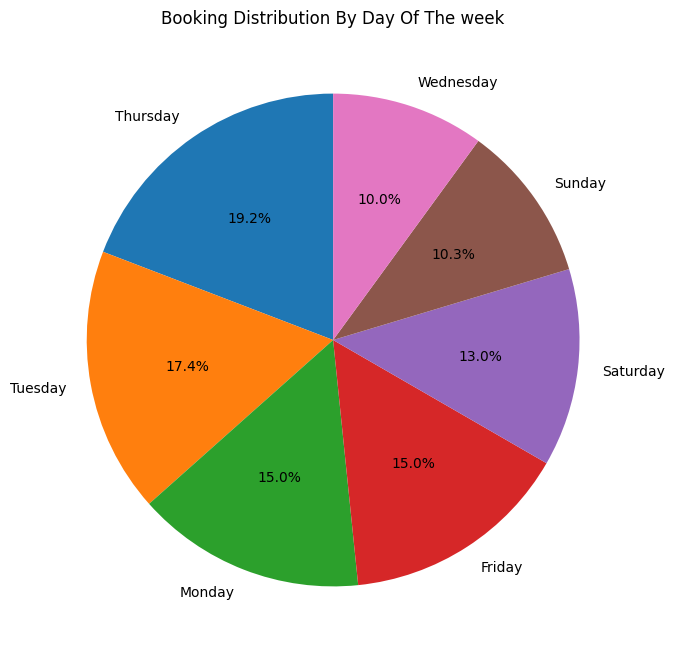

In [36]:
# only using booking datasets and loaded it
import matplotlib.pyplot as plt

# selects the booking_time column and converting it to date time object. once its done then we can extract days
booking_time = pd.to_datetime(bookings_df['booking_time']) 

# datetime object internally stores the info about date, time and other components like day of the week, as 0 to 6 can't be seen directly unless extracted
weekday = booking_time.dt.day_name() 

# counting the number of bookings for each weekday. value_count counts unique value
weekday_counts = weekday.value_counts() 
print(weekday_counts)

#plotting pie chart
plt.figure(figsize = (8,8))
weekday_counts.plot(kind='pie', autopct = "%1.1f%%", startangle = 90, legend = False)
plt.title("Booking Distribution By Day Of The week")
plt.ylabel('') # to hide the ylabel which has count 
plt.show()



4) For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [37]:
# selecting each services name and groupby and count the total number of booking associated
services_name = bookings_df.groupby("service_name").agg(total_bookings =('booking_id','count') ,total_gross_bookings_value_INR =('INR_Amount','sum')) # agg() function, here is used to aggregrate the group data.
print(services_name)



              total_bookings  total_gross_bookings_value_INR
service_name                                                
GOIBIBO                  186                      5897637.97
MMT                       48                       665669.08
YATRA                    105                      3378702.13


5) For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?



In [38]:

# Conting the  customers with number of their booking.
customer_counting = bookings_df.groupby('customer_id')['booking_id'].count()

# finding customer who has more than 1 booking
customer_with_multiple_bookings = customer_counting[customer_counting > 1].index

# filter the dataframe to keep only the customer who has more than 1 bookings.
filtered_dataframe = bookings_df[bookings_df['customer_id'].isin(customer_with_multiple_bookings)]

# Grouping by 'from_city' and 'to_city' and count the number of bookings for each route.
route_counts = filtered_dataframe.groupby(['from_city','to_city'])['booking_id'].count()

# sorting the route counts in descending order to the find the maximum number of bookings.
most_booked_route = route_counts.idxmax()

# Displaying the most booked route
print(f"The most booked route is from {most_booked_route[0]} to {most_booked_route[1] }")








The most booked route is from Gurgaon to Roissy-en-France


6) Which are the top 3 departure cities from where customers mostly book in advance, provided that there have been at least 5 departures from that city?



In [39]:
# Filter cities with at least 5 departures
city_departure_counts = bookings_df['from_city'].value_counts()
cities_with_min_5_departures = city_departure_counts[city_departure_counts >= 5].index

# Filter the data to only include cities with at least 5 departures
filtered_df = bookings_df[bookings_df['from_city'].isin(cities_with_min_5_departures)]# Since I am not specifying specific columns, Pandas keeps all columns of the rows that meet the condition.


# Calculate the average 'days_to_departure' for each city
city_avg_days_to_departure = filtered_df.groupby('from_city')['days_to_departure'].mean()

# Sort the cities by 'days_to_departure' in descending order
sorted_city_avg_days = city_avg_days_to_departure.sort_values(ascending=False)

# Get the top 3 cities
top_3_cities = sorted_city_avg_days.head(3)

print(top_3_cities)







from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


7) Plot a heatmap displaying correlations of the numerical columns and report which pair of numerical columns in the bookings dataset has the maximum correlation.



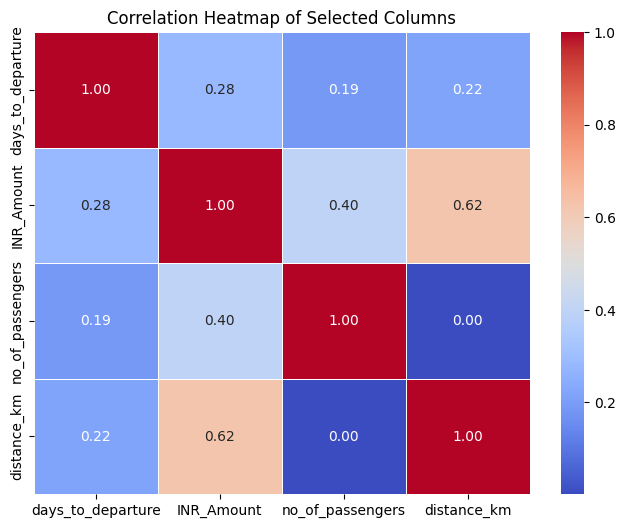

In [40]:
# used seaborn instead of matplotlib beacause of its inbuilt function(sns.heatmap)
import seaborn as sns

# Selecting relevant numerical columns
selected_columns = ['days_to_departure', 'INR_Amount', 'no_of_passengers', 'distance_km']

# Compute correlation matrix for selected columns
correlation_matrix = bookings_df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()



### Findings
- Most correlated pair: INR_Amount and distance_km (0.62) → Longer distances generally cost more.
- Least correlation: no_of_passengers and distance_km (0.00) → The number of passengers does not affect distance traveled.
- Weak correlation: days_to_departure and INR_Amount (0.28) → Booking early has some effect on price but not much.

8) For each service, which is the most used device type for making bookings on the platform?



In [41]:
# Grouping by 'service_name' and 'device_type_used' and counting occurrences in each group (including null values)
device_type_counts = bookings_df.groupby(["service_name", "device_type_used"]).size().reset_index(name="count") 
# .size() counts all rows in each group, including null values, and creates a MultiIndex. 
# reset_index(name="count") converts the MultiIndex Series to a DataFrame, adding the 'count' column for row counts.

# Identifying the most used device for each service by finding the maximum count in each group.
most_used_device_per_service = device_type_counts.loc[device_type_counts.groupby("service_name")["count"].idxmax(), ["service_name", "device_type_used"]]
# groupby("service_name")["count"].idxmax() finds the index of the device with the highest count for each service.
# .loc[...], ensures we select the corresponding 'service_name' and 'device_type_used' columns for the maximum count.

# Shows the most used device for each service.
print(most_used_device_per_service)  


  service_name device_type_used
2      GOIBIBO              IOS
5          MMT          Desktop
9        YATRA          Desktop


9) Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.



<Figure size 1000x800 with 0 Axes>

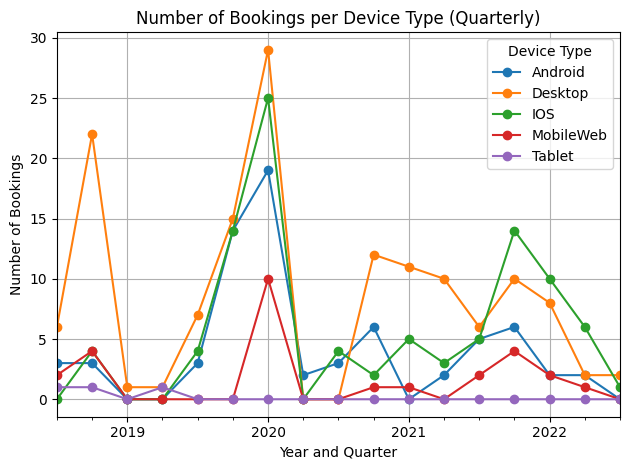

In [42]:
# converts the booking_time column to a datetime object.
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])

# Remove the time part, keeping only the date
bookings_df['booking_time'] = bookings_df['booking_time'].dt.date

# Extract the year and quarter from 'booking_time'
bookings_df['year_quarter'] = pd.to_datetime(bookings_df['booking_time']).dt.to_period('Q')

# Group by 'device_type_used' and 'year_quarter' and count bookings
booking_counts = bookings_df.groupby(['device_type_used', 'year_quarter']).size().unstack(fill_value=0)
#unstack() is a powerful function that reshapes the grouped data and converts the multi-level index into columns, making the data easier to analyze and plot.

# Plotting
plt.figure(figsize=(10, 8))
booking_counts.T.plot(kind='line', marker='o')  # Transpose to make time on the x-axis
plt.title('Number of Bookings per Device Type (Quarterly)')
plt.xlabel('Year and Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.grid(True)
plt.tight_layout()
plt.show()



10) Consider the following example:

12 customers performed a total of 100 searches, but only a few of them performed 10 bookings in total.
Searches = 100
Bookings = 10
Customers = 12

The overall booking-to-search ratio (OBSR) is calculated as:
$$
\text{OBSR} = \frac{\text{Bookings}}{\text{Searches}} = \frac{10}{100} = 0.1
$$


Using the above context, answer the following:

What is the average OBSR for each month of the year?
What is the average OBSR for each day of the week?
Plot a time series of OBSR on all the given dates.


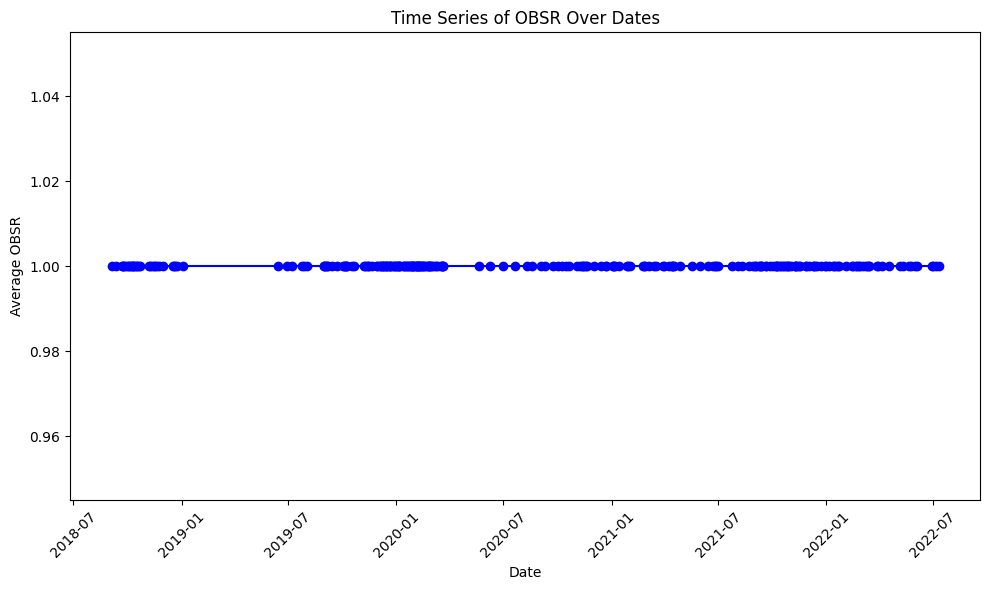

Average OBSR per month:
month
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
Name: OBSR, dtype: float64

Average OBSR per day of the week:
day_of_week
Friday       1.0
Monday       1.0
Saturday     1.0
Sunday       1.0
Thursday     1.0
Tuesday      1.0
Wednesday    1.0
Name: OBSR, dtype: float64


In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Calculate Total Bookings and Total Searches
total_bookings = merged_df['booking_id'].nunique()  # Unique bookings
total_searches = merged_df['search_id'].nunique()   # Unique searches

# Step 2: Calculate the Overall OBSR
OBSR = total_bookings / total_searches  # Overall OBSR

# Added OBSR as a column to the dataframe for reference
merged_df['OBSR'] = OBSR

# Convert 'booking_time' to datetime
merged_df['booking_time'] = pd.to_datetime(merged_df['booking_time'])

# Grouping and calculations for month and day of the week as before
merged_df['month'] = merged_df['booking_time'].dt.month
avg_OBSR_per_month = merged_df.groupby('month')['OBSR'].mean()

merged_df['day_of_week'] = merged_df['booking_time'].dt.day_name()
avg_OBSR_per_day_of_week = merged_df.groupby('day_of_week')['OBSR'].mean()

# 4. Plotting the Time Series of OBSR
merged_df['date'] = merged_df['booking_time'].dt.date
avg_OBSR_per_date = merged_df.groupby('date')['OBSR'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_OBSR_per_date.index, avg_OBSR_per_date.values, marker='o', linestyle='-', color='b')
plt.title("Time Series of OBSR Over Dates")
plt.xlabel("Date")
plt.ylabel("Average OBSR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the average OBSR values for each month and day of the week
print("Average OBSR per month:")
print(avg_OBSR_per_month)

print("\nAverage OBSR per day of the week:")
print(avg_OBSR_per_day_of_week)
